# NORTA
This is a homework implementation of the well-knwon algorithm to generation d-dimensional random vector with correlations. The NORTA or NORmal To Anything Algorithm can create this random vectors by giving just the d-marginal of each dimension. But it degenerates as the dimension grows.

The original paper can be found [here](https://pdfs.semanticscholar.org/8a45/34b1031d611876e2ee047ff5d2dc3757397c.pdf).

In [88]:
import numpy as np
import scipy as sp
from scipy.stats import norm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
def gen_NORTA_from_rand(m,n,v,r):
    """
    weights \in [1,v]
    prices \in [r,v+r]
    """
    matriz = np.random.rand(m,n)
    R = np.corrcoef(matriz)
    print("Correlation Matriz:\n",R)
    L = np.linalg.cholesky(R) #lower
    W = np.random.normal(0, 1, (m,n))
    Z = np.dot(L,W)
    #print(np.shape(Z))
    X = np.empty([m, n])
    #print(np.shape(X))
    for i in range(n):
            X[0,i] = int(float(v-1)*norm.cdf(Z[0,i])+float(1.0))
            X[1,i] = int(float(v)*norm.cdf(Z[1,i])+float(r))
    #print(X)
    return X

Correlation Matriz:
 [[1.         0.03919498]
 [0.03919498 1.        ]]


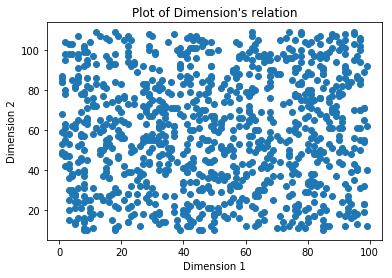

In [91]:
X = gen_NORTA_from_rand(2,1000,100,10)
plt.scatter(X[0,:],X[1,:])
plt.title("Plot of Dimension's relation")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [92]:
def gen_instances_from_NORTA(m,n,R,v,r):
    """
    m: dimensiones
    n: número de muestras
    R: matriz de correlaciones deseada
    weights \in [1,v]
    prices \in [r,v+r]
    """
    L = np.linalg.cholesky(R) #lower
    W = np.random.normal(0, 1, (m,n))
    Z = np.dot(L,W)
    X = np.empty([m, n])
    #print(np.shape(X))
    for i in range(n):
            X[0,i] = int(float(v-1)*norm.cdf(Z[0,i])+float(1.0))
            X[1,i] = int(float(v)*norm.cdf(Z[1,i])+float(r))
    return X

Correlation Matriz:
 [[1, 0.7], [0.7, 1]]


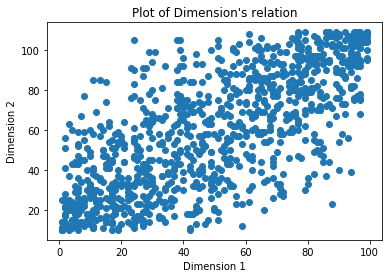

In [105]:
corr = 0.7
R = [[1, corr],[corr, 1]]
print("Correlation Matriz:\n",R)
Z = gen_instances_from_NORTA(2,1000,R,100,10)
plt.scatter(Z[0,:],Z[1,:])
plt.title("Plot of Dimension's relation")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [161]:
import numpy as np
from scipy.stats import norm

class NORTA:
    """
    This class contains the NORmal To Anything (NORTA) algorithm to produce vector with correlations in the dimensions.
    
    Init:
    matrix M (mxn), wich has m-dimensions and n-observations per dimension.
    *args Marginal functions from which the dimension come from.
    If needed **kwargs will contain the parameter (by name) of the Marginal functions
    
    Methods:
    generate: Once initialize the parameters and functions, given the n-observation to generate, the method
    creates a matrix of mxn elementes, with identical Marginal distributions as the original described and with 
    the same correlation.
    """
    def __init__(self, M, *args, **kwargs):
        self.m,n = np.shape(M)
        if len(args) != self.m:
            raise Exception('Not maching number in functions %d and dimension %d in Matrix' %(len(args),self.m))
        self.R = np.corrcoef(M)
        self.L = np.linalg.cholesky(self.R) #lower
        self.functions = args
        self.arguments = kwargs
        
    def inverse_uniform(self,Zi,a,b):
        return ((b-a)*Zi-a)/b
    
    def inverse_normal(self,Zi,mu,sigma):
        """
        Return the inverse of uniform distribution
        how much top most q% cheapest house cost at least? 
        or find x where P(X<=x) = q
        """
        return norm.ppf(q=Zi,loc=mu,scale=sigma)
    
    def generate(self,n):
        W = np.random.normal(0, 1, (self.m,n))
        Z = np.dot(self.L,W)
        X = np.empty([self.m, n])
        for i in range(self.m):
            for j in range(n):
                if self.functions[i]=='uniform':
                    X[i,j] = self.inverse_uniform(
                        norm.cdf(Z[i,j],self.arguments.get('a'),
                                 self.arguments.get('b'))
                elif self.functions[i]=='normal':
                    X[i,j] = self.inverse_normal(
                        norm.cdf(Z[i,j]),self.arguments.get('mu'),
                        self.arguments.get('sigma'))
        return X
    
    def show_corr(self):
        print("Correlation between dimensions:", self.R)

Correlation between dimensions: [[1.         0.01572951]
 [0.01572951 1.        ]]


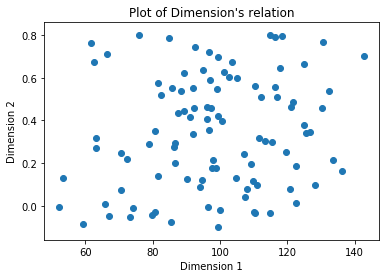

Estimate Correlation: [[1.         0.16420626]
 [0.16420626 1.        ]]


In [167]:
M = np.random.rand(2,500)
Prueba = NORTA(M,'normal','uniform',mu=100,sigma=20,a=10,b=100)
Prueba.show_corr()
X = Prueba.generate(n=100)
plt.scatter(X[0,:],X[1,:])
plt.title("Plot of Dimension's relation")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()
print("Estimate Correlation:",np.corrcoef(X))